# Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
# DBSCAN Clustering libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Some global configurations

In [2]:
warnings.filterwarnings('ignore')

# SNS Styles

In [3]:
sns.set(rc={'figure.figsize': (16, 7)})

In [4]:
sns.set(palette='pastel')
sns.set_style({'axes.facecolor': '#dcdcdc', 'grid.color': '#f5f5f5'})

# Module 1: Data Acquisition and Preprocessing:

## 1. Data Acquisition:

### Download the provided historical sales data for the electronics section.

Data is already downloaded and provided as electornics.json. Let's load it into dataframe and print first five entries.

In [5]:
sales_data = pd.read_json('electronics.json')
sales_data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


### Ensure the data includes customer demographics, purchase history, product details, spending amounts, and dates of transactions

Let's check in data if data includes the required columns.

In [6]:
sales_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season'],
      dtype='object')

As the columns showing that all required columns presents.

## 2. Data Cleaning:

### Identify and handle missing values using appropriate techniques like mean/median imputation or dropping rows/columns with excessive missingness.

Let's first check the missing values present.

By seeing dataframe, we can see that missing values represented by "". So, we replace it with np.nan for further procession.

In [7]:
sales_data['Age'].value_counts()

Age
          33
38        28
70        24
20        24
79        24
          ..
41         9
65         9
24         9
Hidden     7
55         7
Name: count, Length: 65, dtype: int64

By checking the data, I've found that there are some empty values and also some 'Hidden' values. Let's check there count.

In [8]:
sales_data.replace('', np.nan).isna().sum()

Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            40
Year                             39
Season                           36
dtype: int64

In [9]:
sales_data.replace('Hidden', np.nan).isna().sum()

Customer_ID                      12
Age                               7
Gender                           15
Income_Level                      9
Address                          15
Transaction_ID                   11
Purchase_Date                    13
Product_ID                        9
Product_Category                 16
Brand                            12
Purchase_Amount                  16
Average_Spending_Per_Purchase    14
Purchase_Frequency_Per_Month     18
Brand_Affinity_Score             14
Product_Category_Preferences     12
Month                            13
Year                             13
Season                           12
dtype: int64

Now let's replace these values with np.nan.

In [10]:
sales_data.replace('', np.nan, inplace=True)
sales_data.replace('Hidden', np.nan, inplace=True)
sales_data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


Now let's count the total missing value in each column.

In [11]:
sales_data.isna().sum()

Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64

Now let's fill these missing values.

In [12]:
sales_data.dropna(subset=['Customer_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier for the data

sales_data['Age'].fillna(sales_data['Age'].median(), inplace=True) # Replace Age missing values with median as age is numerical data

sales_data['Gender'].fillna(sales_data['Gender'].mode()[0], inplace=True) # As Gender is categorical data, replacing its missing values with mode will be the best option
sales_data['Income_Level'].fillna(sales_data['Income_Level'].mode()[0], inplace=True) # As Income Level is categorical, mode will be best for filling values

sales_data.drop("Address", axis=1, inplace=True) # As address is not much important for our analysis, dropping the column will be the best option
sales_data.drop("Transaction_ID", axis=1, inplace=True) # As Transaction ID is not much important for our analysis, dropping the column will be the best option

sales_data['Purchase_Date'].fillna(method='ffill', inplace=True) # Fill Purchase Date with the forward fill

sales_data.dropna(subset=['Product_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier to check the product which sold

sales_data['Product_Category'].fillna(sales_data['Product_Category'].mode()[0], inplace=True)
sales_data['Brand'].fillna(sales_data['Brand'].mode()[0], inplace=True)

sales_data['Purchase_Amount'].fillna(sales_data['Purchase_Amount'].median(), inplace=True)
sales_data['Average_Spending_Per_Purchase'].fillna(sales_data['Average_Spending_Per_Purchase'].median(), inplace=True)
sales_data['Purchase_Frequency_Per_Month'].fillna(sales_data['Purchase_Frequency_Per_Month'].median(), inplace=True)
sales_data['Brand_Affinity_Score'].fillna(sales_data['Brand_Affinity_Score'].median(), inplace=True)

sales_data['Product_Category_Preferences'].fillna(sales_data['Product_Category_Preferences'].mode()[0], inplace=True)
sales_data['Month'].fillna(sales_data['Month'].mode()[0], inplace=True)
sales_data['Year'].fillna(sales_data['Year'].mode()[0], inplace=True)
sales_data['Season'].fillna(sales_data['Season'].mode()[0], inplace=True)

sales_data.reset_index(inplace=True)
sales_data.drop('index', axis=1, inplace=True)
sales_data.head(2)

,Customer_ID,Age,Gender,Income_Level,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,04,1995,Winter


In [13]:
sales_data.isna().sum()

Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

### Analyze outliers and determine whether to retain or remove them based on their impact on the analysis.

In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    910 non-null    object
 1   Age                            910 non-null    object
 2   Gender                         910 non-null    object
 3   Income_Level                   910 non-null    object
 4   Purchase_Date                  910 non-null    object
 5   Product_ID                     910 non-null    object
 6   Product_Category               910 non-null    object
 7   Brand                          910 non-null    object
 8   Purchase_Amount                910 non-null    object
 9   Average_Spending_Per_Purchase  910 non-null    object
 10  Purchase_Frequency_Per_Month   910 non-null    object
 11  Brand_Affinity_Score           910 non-null    object
 12  Product_Category_Preferences   910 non-null    object
 13  Month

In [15]:
# sales_data['Customer_ID'] = sales_data['Customer_ID'].astype('')
sales_data['Age'] = sales_data['Age'].astype('int')
# sales_data['Gender'] = sales_data['Gender'].astype('')
# sales_data['Income_Level'] = sales_data['Income_Level'].astype('')
# sales_data['Address'] = sales_data['Address'].astype('')
# sales_data['Transaction_ID'] = sales_data['Transaction_ID'].astype('')
sales_data['Purchase_Date'] = sales_data['Purchase_Date'].astype('datetime64[ns]')
# sales_data['Product_ID'] = sales_data['Product_ID'].astype('')
# sales_data['Product_Category'] = sales_data['Product_Category'].astype('')
# sales_data['Brand'] = sales_data['Brand'].astype('')
sales_data['Purchase_Amount'] = sales_data['Purchase_Amount'].astype('int')
sales_data['Average_Spending_Per_Purchase'] = sales_data['Average_Spending_Per_Purchase'].astype('int')
sales_data['Purchase_Frequency_Per_Month'] = sales_data['Purchase_Frequency_Per_Month'].astype('int')
sales_data['Brand_Affinity_Score'] = sales_data['Brand_Affinity_Score'].astype('int')
# sales_data['Product_Category_Preferences'] = sales_data['Product_Category_Preferences'].astype('')
sales_data['Month'] = sales_data['Month'].astype('int')
sales_data['Year'] = sales_data['Year'].astype('int')
# sales_data['Season'] = sales_data['Season'].astype('')

In [16]:
description = sales_data.describe()
IQR = description.loc['75%'] - description.loc['25%']
integer_columns = sales_data.select_dtypes(include='int').columns
for column in integer_columns:
    lower_bound = description.loc['25%', column] - 1.5 * IQR[column]
    upper_bound = description.loc['75%', column] + 1.5 * IQR[column]
    filtered_values = sales_data[~((sales_data[column] >= lower_bound) & (sales_data[column] <= upper_bound))][column]
    print("Values between {} and {}: {}".format(lower_bound, upper_bound, filtered_values.tolist()))

Values between -11.5 and 112.5: []
Values between -206.5 and 709.5: []
Values between -37.0 and 139.0: []
Values between -4.5 and 15.5: []
Values between -4.5 and 15.5: []
Values between -3.5 and 16.5: []
Values between 1947.5 and 2047.5: []


We can see that no outlier present here.

###  Address inconsistencies in data format and encoding.

Now check the inconsistencies in the data format and encoding.

In [17]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    910 non-null    object        
 1   Age                            910 non-null    int32         
 2   Gender                         910 non-null    object        
 3   Income_Level                   910 non-null    object        
 4   Purchase_Date                  910 non-null    datetime64[ns]
 5   Product_ID                     910 non-null    object        
 6   Product_Category               910 non-null    object        
 7   Brand                          910 non-null    object        
 8   Purchase_Amount                910 non-null    int32         
 9   Average_Spending_Per_Purchase  910 non-null    int32         
 10  Purchase_Frequency_Per_Month   910 non-null    int32         
 11  Brand_Affinity_Scor

As all is in objects, let's convert them to their respective format for proper precessing.

In [18]:
# sales_data['Customer_ID'] = sales_data['Customer_ID'].astype('')
sales_data['Age'] = sales_data['Age'].astype('int')
# sales_data['Gender'] = sales_data['Gender'].astype('')
# sales_data['Income_Level'] = sales_data['Income_Level'].astype('')
# sales_data['Address'] = sales_data['Address'].astype('')
# sales_data['Transaction_ID'] = sales_data['Transaction_ID'].astype('')
sales_data['Purchase_Date'] = sales_data['Purchase_Date'].astype('datetime64[ns]')
# sales_data['Product_ID'] = sales_data['Product_ID'].astype('')
# sales_data['Product_Category'] = sales_data['Product_Category'].astype('')
# sales_data['Brand'] = sales_data['Brand'].astype('')
sales_data['Purchase_Amount'] = sales_data['Purchase_Amount'].astype('int')
sales_data['Average_Spending_Per_Purchase'] = sales_data['Average_Spending_Per_Purchase'].astype('int')
sales_data['Purchase_Frequency_Per_Month'] = sales_data['Purchase_Frequency_Per_Month'].astype('int')
sales_data['Brand_Affinity_Score'] = sales_data['Brand_Affinity_Score'].astype('int')
# sales_data['Product_Category_Preferences'] = sales_data['Product_Category_Preferences'].astype('')
sales_data['Month'] = sales_data['Month'].astype('int')
sales_data['Year'] = sales_data['Year'].astype('int')
# sales_data['Season'] = sales_data['Season'].astype('')

## 3. Data Transformation:

### Create new features that provide deeper insights into customer behavior, such as:
* Average spending per purchase
* Purchase frequency per month
* Brand affinity score (based on product brand preferences)
* Product category preferences (e.g., TVs, smartphones, laptops)

In [19]:
sales_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Purchase_Date',
       'Product_ID', 'Product_Category', 'Brand', 'Purchase_Amount',
       'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month',
       'Brand_Affinity_Score', 'Product_Category_Preferences', 'Month', 'Year',
       'Season'],
      dtype='object')

We can check that all of these are already present.

### Standardize or normalize numeric features to ensure they contribute equally to the clustering algorithms.

Now let's standerdize the numeric features.

In [20]:
integer_columns = sales_data.select_dtypes(include='int')
for column in integer_columns:
    sales_data[column+"_n"] = (sales_data[column] - sales_data[column].mean()) / sales_data[column].std()

In [21]:
sales_data.head(2)

,Customer_ID,Age,Gender,Income_Level,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,...,Month,Year,Season,Age_n,Purchase_Amount_n,Average_Spending_Per_Purchase_n,Purchase_Frequency_Per_Month_n,Brand_Affinity_Score_n,Month_n,Year_n
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,...,1,2010,Winter,-0.549891,-0.407459,0.278761,-1.244885,-1.211692,-1.584554,0.864915
1,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,...,4,1995,Winter,0.399318,-0.378231,1.818217,1.303289,-1.573925,-0.703170,-0.139688


# Module 2: Exploratory Data Analysis(EDA):

## 1. Univariate Analysis:

### Analyze the distribution of key features like customer age, purchase amount, and purchase frequency using histograms, boxplots, and descriptive statistics.

Let's analyze the key features using histogram, boxplots and descriptive statistice.

In [ ]:
# Get all the columns with their datatype
sales_data.info()

In [ ]:
# Get the data that isn't normalized in another dataframe name eda_df for exploratory data analysis
eda_columns = sales_data.select_dtypes(include=['int', 'object', 'datetime64[ns]'])
eda_df = sales_data[eda_columns.columns]

In [ ]:
# Descriptive statistics for numerical and object type columns seperately
display(eda_df.describe())
display(eda_df.describe(include='object'))

In [ ]:
integer_columns = eda_df.select_dtypes(include='int').columns
splits = 2
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(12, 16))
for i in range(integer_columns_length):
    title = " ".join(integer_columns[i].split("_"))
    temp_axes = fig.add_subplot(math.ceil(integer_columns_length/splits), splits, i+1)
    temp_axes.hist(eda_df[integer_columns[i]])
    temp_axes.grid(axis='x')
    temp_axes.set_title(title + " among number of sales")
    temp_axes.set_ylabel('Number of sales')
    temp_axes.set_xlabel(title)
    
plt.tight_layout()
plt.show()

In [ ]:
integer_columns = eda_df.select_dtypes(include='int').columns
splits = 2
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(12, 24))
for i in range(integer_columns_length):
    title = " ".join(integer_columns[i].split("_"))
    temp_axes = fig.add_subplot(math.ceil(integer_columns_length/splits), splits, i+1)
    temp_axes = sns.boxplot(eda_df[integer_columns[i]])
    temp_axes.grid(axis='x')
    temp_axes.set_title(title + " boxplot")
    temp_axes.set_ylabel(title)
    
plt.tight_layout()
plt.show()

### Identify potential skewness or outliers in the data.

On seeing the data, we can see that no outlier is present in data and also data is not too much skewed.

## 2. Bivariate Analysis:


### Utilize scatterplots and heatmaps to explore relationships between different features, such as purchase amount vs. income level, brand affinity vs. product category, and purchase frequency vs. age.

In [ ]:
integer_columns = eda_df.select_dtypes(include='int').columns
splits = 1
temp = 0
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(12, 200))
for i in range(integer_columns_length):
    for j in range(integer_columns_length):
        if i!= j:
            temp = temp + 1
            title_j = " ".join(integer_columns[j].split("_"))
            title_i = " ".join(integer_columns[i].split("_"))
            temp_axes = fig.add_subplot(math.ceil((integer_columns_length*integer_columns_length - integer_columns_length)/splits), splits, temp)
            temp_axes = sns.regplot(x=eda_df[integer_columns[i]], y=eda_df[integer_columns[j]], 
                                    scatter_kws={"color": "green"}, line_kws={"color": "red"})
            temp_axes.grid(axis='x')
            temp_axes.set_title(title_i + " among " + title_j)
            temp_axes.set_ylabel(title_j)
            temp_axes.set_xlabel(title_i)
    
plt.tight_layout()
plt.show()

In [ ]:
correlation = eda_df.select_dtypes(include=['int', 'datetime64[ns]']).corr()
fig, ax = plt.subplots()
im = ax.pcolor(correlation)
ax.set_xticks(np.arange(correlation.shape[1])+0.5)
ax.set_yticks(np.arange(correlation.shape[0])+0.5)
ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.index)
ax.tick_params(axis='x', rotation = 90)
fig.colorbar(im)

### Investigate the presence of correlations and identify any impactful relationships.

We can see that very low correlation is present between fields and also the linear line shows very less dependency of features.

## Temporal Analysis:

In [ ]:
eda_df.head()

In [ ]:
integer_columns = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month']
splits = 1
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(14, 10))
group_by_data = eda_df.groupby(eda_df['Purchase_Date'])
for i in range(integer_columns_length):
        title_i = " ".join(integer_columns[i].split("_"))
        temp_axes = fig.add_subplot(math.ceil(integer_columns_length/splits), splits, i + 1)
        data = group_by_data[integer_columns[i]].sum()
        # cum_data = group_by_data[integer_columns[i]].count()
        # for temp in data:
        # display(data)
        # display(data.index)
        # data.unstack()
        # data.plot(kind="line")
        # temp_axes = eda_df['Purchase_Date'].dt.year.value_counts().plot(kind="line")
        temp_axes.plot(data.index, data.values)
        print(data)
        # temp_axes.plot(cum_data.index, cum_data.values)
        # temp_axes.grid(axis='x')
        temp_axes.set_title(title_i + " trend over time")
        # temp_axes.set_xlabel("Purchase Date")
        # temp_axes.set_ylabel(title_i)
        # if i >= 0:
        # break
    
plt.tight_layout()
plt.show()

## DBSCAN Clustering

### 1. Define eps and MinPts parameters:

In [40]:
columns_for_clustering = ['Age_n', 'Purchase_Amount_n', 'Average_Spending_Per_Purchase_n', 
                           'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n', 
                           'Month_n', 'Year_n']

data_for_clustering = sales_data[columns_for_clustering]

eps_values = [0.5, 1.0, 1.5, 2.0]  
min_pts_values = [5, 10, 15]  

best_eps = None
best_min_pts = None
best_silhouette_score = -1

for eps in eps_values:
    for min_pts in min_pts_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(data_for_clustering)
        
        unique_labels = pd.Series(labels).unique()
        if len(unique_labels) > 1:
            silhouette = silhouette_score(data_for_clustering, labels)
            
            print(f"For eps={eps}, MinPts={min_pts}, Silhouette Score: {silhouette}")
            
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_pts = min_pts
        else:
            print(f"For eps={eps}, MinPts={min_pts}, Number of unique labels is less than 2.")

print(f"Best Eps: {best_eps}")
print(f"Best MinPts: {best_min_pts}")





For eps=0.5, MinPts=5, Number of unique labels is less than 2.
For eps=0.5, MinPts=10, Number of unique labels is less than 2.
For eps=0.5, MinPts=15, Number of unique labels is less than 2.
For eps=1.0, MinPts=5, Number of unique labels is less than 2.
For eps=1.0, MinPts=10, Number of unique labels is less than 2.
For eps=1.0, MinPts=15, Number of unique labels is less than 2.
For eps=1.5, MinPts=5, Silhouette Score: -0.1352878388126875
For eps=1.5, MinPts=10, Silhouette Score: -0.14912946145117598
For eps=1.5, MinPts=15, Silhouette Score: -0.045971333772704286
For eps=2.0, MinPts=5, Number of unique labels is less than 2.
For eps=2.0, MinPts=10, Number of unique labels is less than 2.
For eps=2.0, MinPts=15, Silhouette Score: 0.17771481885961324
Best Eps: 2.0
Best MinPts: 15


### 2. Apply DBSCAN algorithm:

#### Columns for clustering for AGE

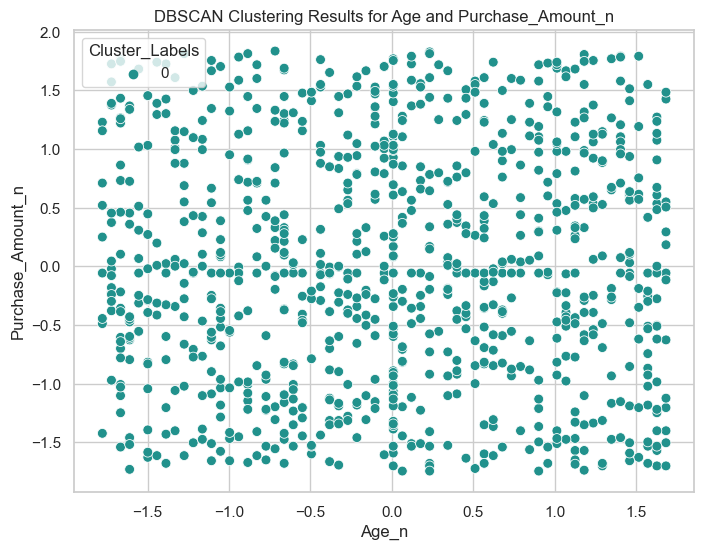

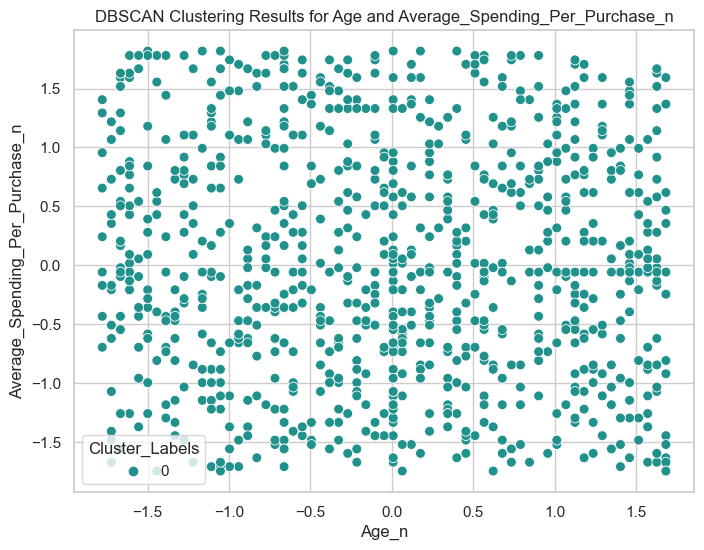

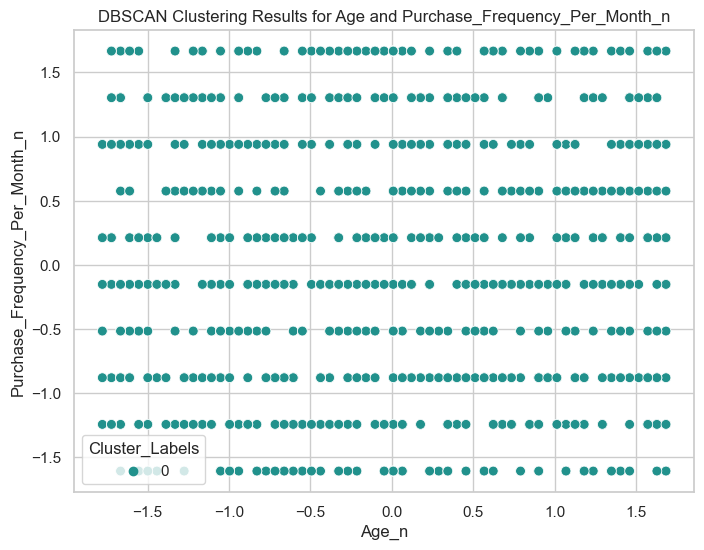

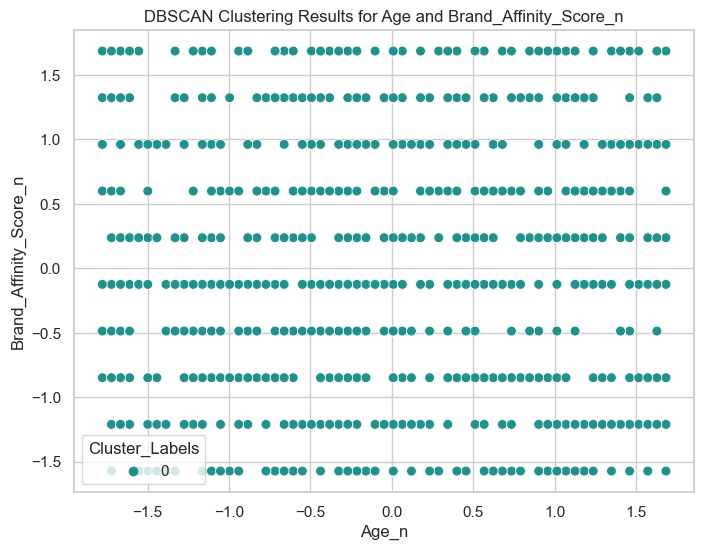

In [41]:
    columns_for_clustering_age = ['Age_n', 'Purchase_Amount_n', 'Average_Spending_Per_Purchase_n', 
                            'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n']

    data_for_clustering = sales_data[columns_for_clustering_age]

    best_dbscan = DBSCAN(eps=2.0, min_samples=15)
    best_labels = best_dbscan.fit_predict(data_for_clustering)

    sales_data['Cluster_Labels'] = best_labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age_n', y='Purchase_Amount_n', data=sales_data, hue='Cluster_Labels', palette='viridis', s=50)
    plt.title('DBSCAN Clustering Results for Age and Purchase_Amount_n')
    plt.xlabel('Age_n')
    plt.ylabel('Purchase_Amount_n')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', data=sales_data, hue='Cluster_Labels', palette='viridis', s=50)
    plt.title('DBSCAN Clustering Results for Age and Average_Spending_Per_Purchase_n')
    plt.xlabel('Age_n')
    plt.ylabel('Average_Spending_Per_Purchase_n')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age_n', y='Purchase_Frequency_Per_Month_n', data=sales_data, hue='Cluster_Labels', palette='viridis', s=50)
    plt.title('DBSCAN Clustering Results for Age and Purchase_Frequency_Per_Month_n')
    plt.xlabel('Age_n')
    plt.ylabel('Purchase_Frequency_Per_Month_n')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age_n', y='Brand_Affinity_Score_n', data=sales_data, hue='Cluster_Labels', palette='viridis', s=50)
    plt.title('DBSCAN Clustering Results for Age and Brand_Affinity_Score_n')
    plt.xlabel('Age_n')
    plt.ylabel('Brand_Affinity_Score_n')
    plt.show()


#### Columns for clustering for Purchase_Amount_n

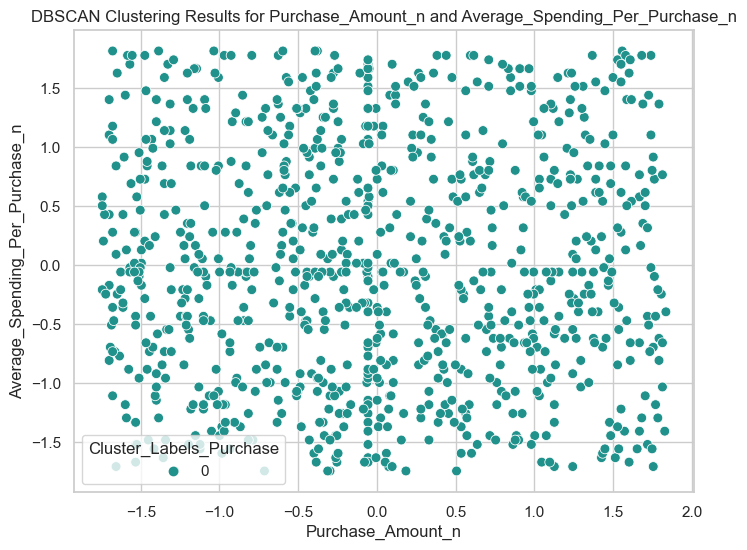

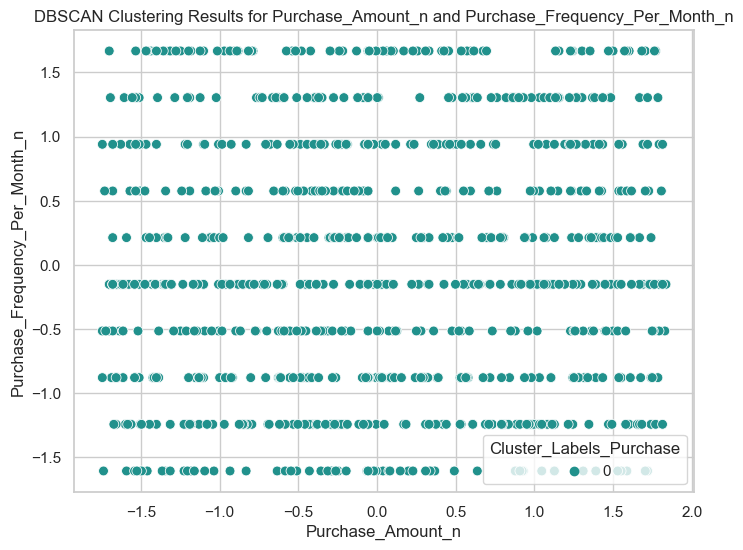

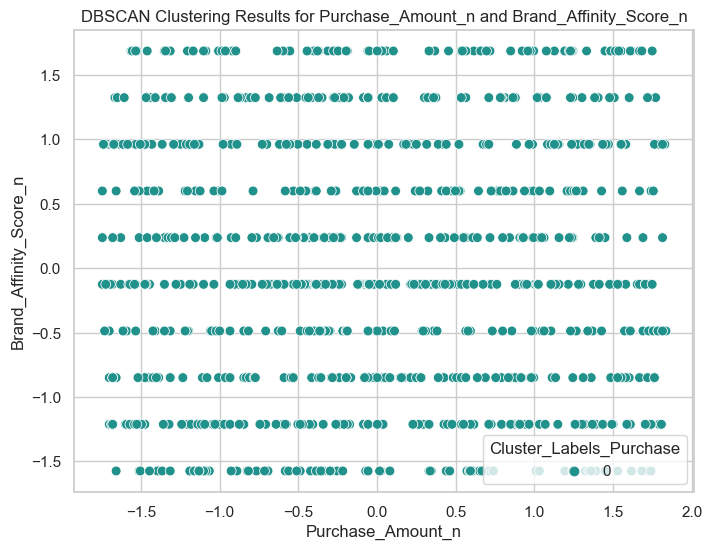

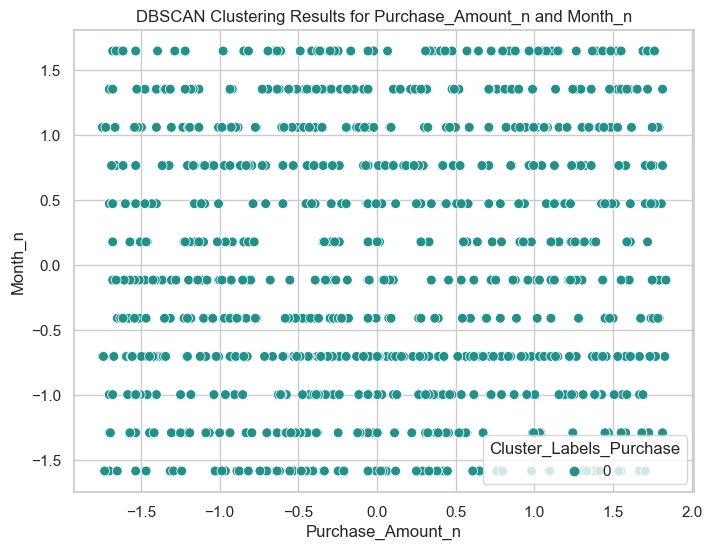

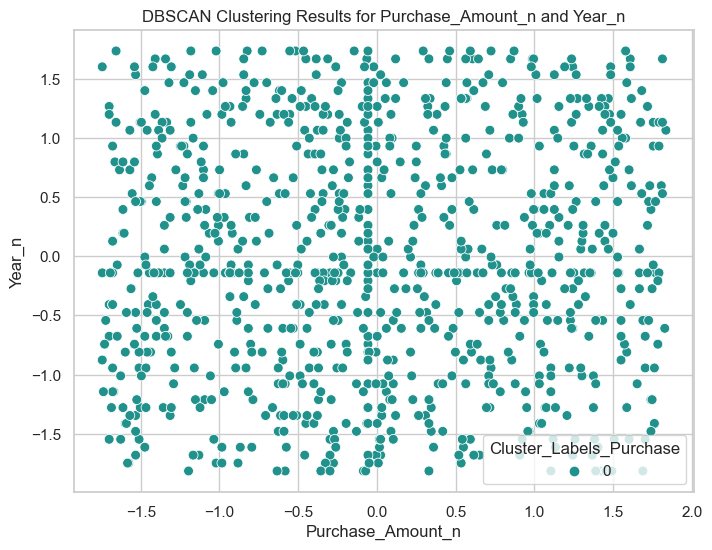

In [42]:
columns_for_clustering_purchase = ['Purchase_Amount_n', 'Average_Spending_Per_Purchase_n', 
                                   'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n', 'Month_n', 'Year_n']

data_for_clustering_purchase = sales_data[columns_for_clustering_purchase]

best_dbscan_purchase = DBSCAN(eps=2.0, min_samples=15)
best_labels_purchase = best_dbscan_purchase.fit_predict(data_for_clustering_purchase)

sales_data['Cluster_Labels_Purchase'] = best_labels_purchase

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Average_Spending_Per_Purchase_n', 
                data=sales_data, hue='Cluster_Labels_Purchase', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Amount_n and Average_Spending_Per_Purchase_n')
plt.xlabel('Purchase_Amount_n')
plt.ylabel('Average_Spending_Per_Purchase_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Purchase_Frequency_Per_Month_n', 
                data=sales_data, hue='Cluster_Labels_Purchase', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Amount_n and Purchase_Frequency_Per_Month_n')
plt.xlabel('Purchase_Amount_n')
plt.ylabel('Purchase_Frequency_Per_Month_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Brand_Affinity_Score_n', 
                data=sales_data, hue='Cluster_Labels_Purchase', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Amount_n and Brand_Affinity_Score_n')
plt.xlabel('Purchase_Amount_n')
plt.ylabel('Brand_Affinity_Score_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Month_n', 
                data=sales_data, hue='Cluster_Labels_Purchase', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Amount_n and Month_n')
plt.xlabel('Purchase_Amount_n')
plt.ylabel('Month_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Year_n', 
                data=sales_data, hue='Cluster_Labels_Purchase', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Amount_n and Year_n')
plt.xlabel('Purchase_Amount_n')
plt.ylabel('Year_n')
plt.show()


#### Columns for clustering for Average_Spending_Per_Purchase_n

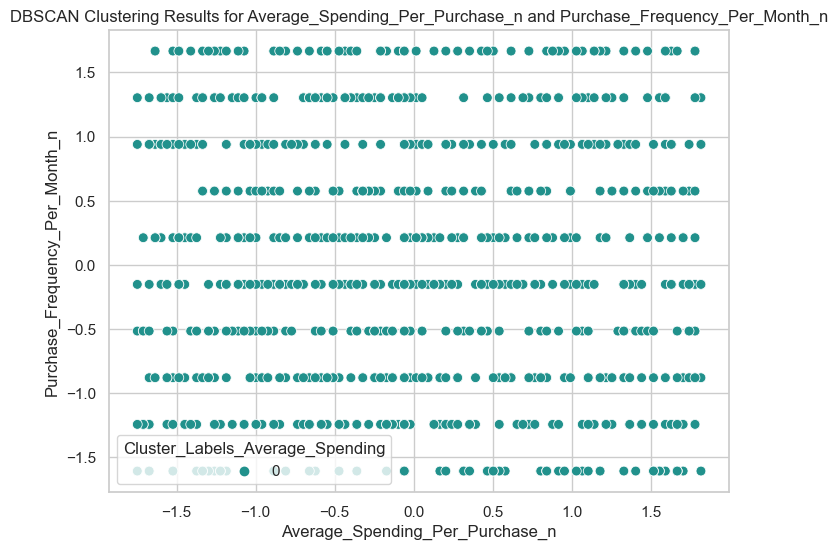

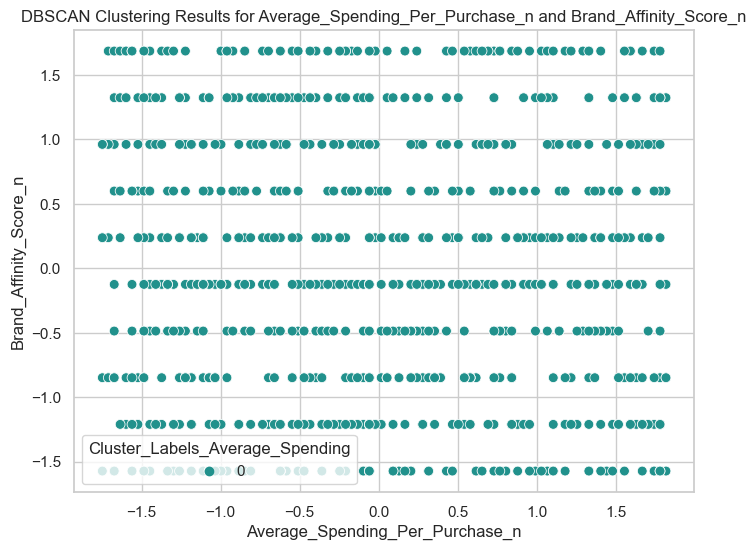

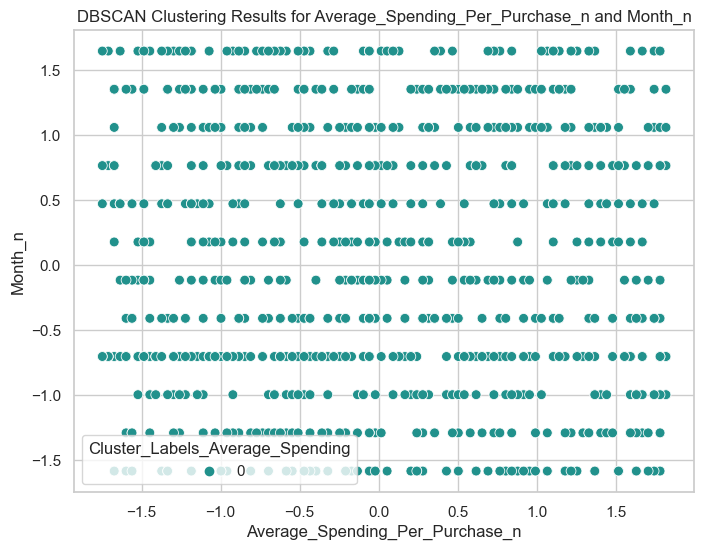

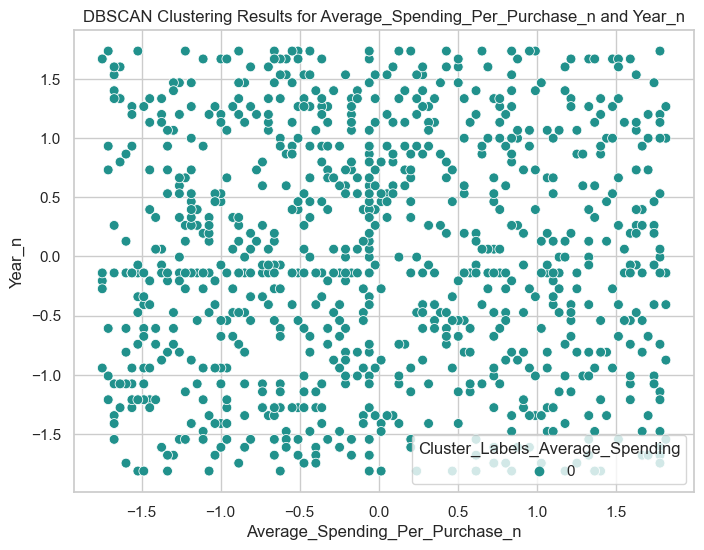

In [43]:
columns_for_clustering_average_spending = ['Average_Spending_Per_Purchase_n', 
                                           'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n', 'Month_n', 'Year_n']

data_for_clustering_average_spending = sales_data[columns_for_clustering_average_spending]

best_dbscan_average_spending = DBSCAN(eps=2.0, min_samples=15)
best_labels_average_spending = best_dbscan_average_spending.fit_predict(data_for_clustering_average_spending)

sales_data['Cluster_Labels_Average_Spending'] = best_labels_average_spending

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Spending_Per_Purchase_n', y='Purchase_Frequency_Per_Month_n', 
                data=sales_data, hue='Cluster_Labels_Average_Spending', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Average_Spending_Per_Purchase_n and Purchase_Frequency_Per_Month_n')
plt.xlabel('Average_Spending_Per_Purchase_n')
plt.ylabel('Purchase_Frequency_Per_Month_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Spending_Per_Purchase_n', y='Brand_Affinity_Score_n', 
                data=sales_data, hue='Cluster_Labels_Average_Spending', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Average_Spending_Per_Purchase_n and Brand_Affinity_Score_n')
plt.xlabel('Average_Spending_Per_Purchase_n')
plt.ylabel('Brand_Affinity_Score_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Spending_Per_Purchase_n', y='Month_n', 
                data=sales_data, hue='Cluster_Labels_Average_Spending', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Average_Spending_Per_Purchase_n and Month_n')
plt.xlabel('Average_Spending_Per_Purchase_n')
plt.ylabel('Month_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Spending_Per_Purchase_n', y='Year_n', 
                data=sales_data, hue='Cluster_Labels_Average_Spending', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Average_Spending_Per_Purchase_n and Year_n')
plt.xlabel('Average_Spending_Per_Purchase_n')
plt.ylabel('Year_n')
plt.show()


#### Columns for clustering for Purchase_Frequency_Per_Month_n

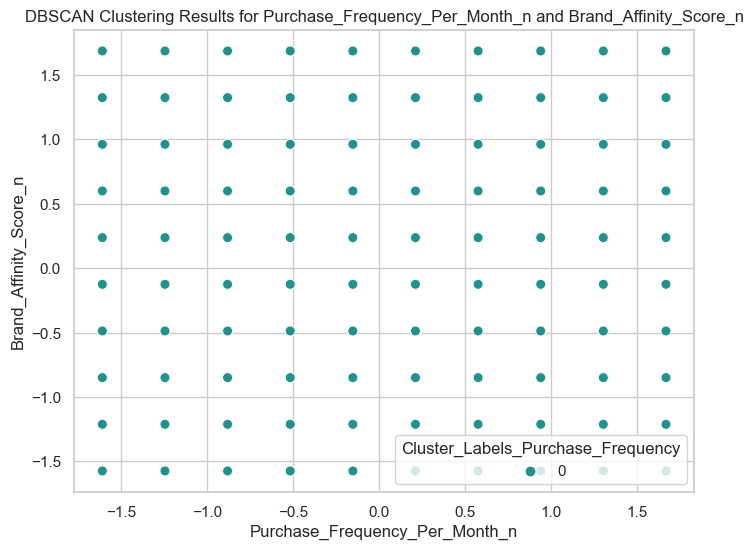

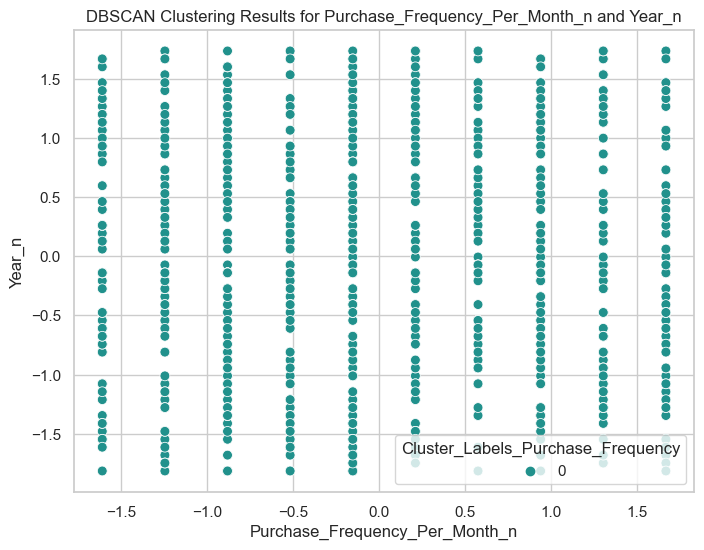

In [45]:
columns_for_clustering_purchase_frequency = ['Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n', 'Year_n']

data_for_clustering_purchase_frequency = sales_data[columns_for_clustering_purchase_frequency]

best_dbscan_purchase_frequency = DBSCAN(eps=2.0, min_samples=15)
best_labels_purchase_frequency = best_dbscan_purchase_frequency.fit_predict(data_for_clustering_purchase_frequency)

sales_data['Cluster_Labels_Purchase_Frequency'] = best_labels_purchase_frequency

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Frequency_Per_Month_n', y='Brand_Affinity_Score_n', 
                data=sales_data, hue='Cluster_Labels_Purchase_Frequency', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Frequency_Per_Month_n and Brand_Affinity_Score_n')
plt.xlabel('Purchase_Frequency_Per_Month_n')
plt.ylabel('Brand_Affinity_Score_n')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchase_Frequency_Per_Month_n', y='Year_n', 
                data=sales_data, hue='Cluster_Labels_Purchase_Frequency', palette='viridis', s=50)
plt.title('DBSCAN Clustering Results for Purchase_Frequency_Per_Month_n and Year_n')
plt.xlabel('Purchase_Frequency_Per_Month_n')
plt.ylabel('Year_n')
plt.show()


### 3. Analyze cluster characteristics:

In [54]:

# Analyze the resulting clusters for Age
cluster_sizes_age = sales_data['Cluster_Labels'].value_counts()
print("Cluster Sizes for Age_n:")
print(cluster_sizes_age)

cluster_density_age = cluster_sizes_age / len(sales_data)
print("Cluster Densities for Age_n:")
print(cluster_density_age)


# Analyze the resulting clusters for Purchase
cluster_sizes_age = sales_data['Cluster_Labels_Purchase'].value_counts()
print("\nCluster Sizes for Purchase Amount n:")
print(cluster_sizes_age)

cluster_density_age = cluster_sizes_age / len(sales_data)
print("Cluster Densities for Purchase Amount n:")
print(cluster_density_age)


# Analyze the resulting clusters for Purchase
cluster_sizes_age = sales_data['Cluster_Labels_Average_Spending'].value_counts()
print("\nCluster Sizes for Average_Spending_Per_Purchase_n:")
print(cluster_sizes_age)

cluster_density_age = cluster_sizes_age / len(sales_data)
print("Cluster Densities for Average_Spending_Per_Purchase_n:")
print(cluster_density_age)


# Analyze the resulting clusters for Purchase
cluster_sizes_age = sales_data['Cluster_Labels_Purchase_Frequency'].value_counts()
print("\nCluster Sizes for Purchase_Frequency_Per_Month_n:")
print(cluster_sizes_age)

cluster_density_age = cluster_sizes_age / len(sales_data)
print("Cluster Densities for Purchase_Frequency_Per_Month_n:")
print(cluster_density_age)



Cluster Sizes for Age_n:
Cluster_Labels
0    910
Name: count, dtype: int64
Cluster Densities for Age_n:
Cluster_Labels
0    1.0
Name: count, dtype: float64

Cluster Sizes for Purchase Amount n:
Cluster_Labels_Purchase
0    910
Name: count, dtype: int64
Cluster Densities for Purchase Amount n:
Cluster_Labels_Purchase
0    1.0
Name: count, dtype: float64

Cluster Sizes for Average_Spending_Per_Purchase_n:
Cluster_Labels_Average_Spending
0    910
Name: count, dtype: int64
Cluster Densities for Average_Spending_Per_Purchase_n:
Cluster_Labels_Average_Spending
0    1.0
Name: count, dtype: float64

Cluster Sizes for Purchase_Frequency_Per_Month_n:
Cluster_Labels_Purchase_Frequency
0    910
Name: count, dtype: int64
Cluster Densities for Purchase_Frequency_Per_Month_n:
Cluster_Labels_Purchase_Frequency
0    1.0
Name: count, dtype: float64
